# Brief - Les modèles dans tous leurs états

### Tutoriel 1 - Le dataset Hand written digits & le modèle SVM

Avec ce premier tutoriel, nous allons aborder un premier exemples de cas de machine learning. Il est d'abord nécessaire de connaître cette notion afin de pouvoir comprendre ce que nous allons faire. Pour cela, je peux vous conseiller de vous référer au cours commun "C'est quoi l'IA ?" réalisé par la P12 Développeur IA, partie 2 (p.8 à 12)

Dans notre exemple, nous souhaitons reconnaître des chiffres (de 1 à 10) écrit à la main, à partir des images fournies par notre dataset.

###### Analyse du dataset

Dans un premier temps, nous allons importer les librairies nécessaires à ce tutoriel, et exécuter cette première cellule.

In [36]:
# Import packages 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import svm
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

In [ ]:
# adapter, il doit s'agir d'un modèle de svm et pas random forest
# il y a une ligne à changer visiblement

Ici, nous avons nottamment besoin de numpy, afin de lire un array, matplotlib pour la visualisation et la librairie Scikit-learn, destinée à l'apprentissage automatique, et qui peut nous apporter beaucoup d'options.

Ensuite, nous avons besoin d'importer notre dataset avec la commande datasets.load

In [10]:
digits = sklearn.datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Nous pouvons aussi utiliser la commande .DESCR afin d'avoir la description de notre dataset.

In [11]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

Dans le cadre de notre reconnaissance de chiffres écrits à la main, nous voyons qu'il y a 1797 exemples avec chacuns 8x8 pixels pour représenter ces chiffres.

Si nous vérifions les attributs de notre dataset, voilà ce qui en ressort :

In [38]:
digits.images.shape

(1797, 8, 8)

C'est un tableau à 3 dimensions, avec 
- le nbre d'images
- les coordonnées x des pixels
- les coordonnées y des pixels

In [39]:
digits.target.shape

(1797,)

In [40]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Nous pouvons faire un test en affichant les données pour la 3e image par exemple ...

In [48]:
print(digits.images[2])

[[ 0.  0.  0.  4. 15. 12.  0.  0.]
 [ 0.  0.  3. 16. 15. 14.  0.  0.]
 [ 0.  0.  8. 13.  8. 16.  0.  0.]
 [ 0.  0.  1.  6. 15. 11.  0.  0.]
 [ 0.  1.  8. 13. 15.  1.  0.  0.]
 [ 0.  9. 16. 16.  5.  0.  0.  0.]
 [ 0.  3. 13. 16. 16. 11.  5.  0.]
 [ 0.  0.  0.  3. 11. 16.  9.  0.]]


Certaines valeurs sont grandes que d'autres, ce qui correspond à la quantité de "noir" dans un pixel. On peut déjà dessiner une forme à partir des valeurs les plus grandes, mais ici, nous allons utiliser la librairie matplotlib pour avoir un visuel plus adapté.

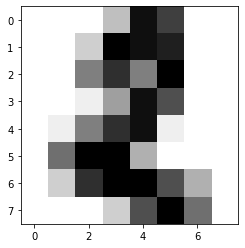

In [50]:
plt.imshow(digits.images[2],cmap='binary')

###### Apprentissage du modèle

Dans la suite de ce tutoriel, nous allons mettre en place notre modèle en lui donnant des exemples afin de lui permettre de progresser.
Ici, nous aurons besoin d'entrées (input layer) et de sorties (output layer). Ici nous allons vectoriser l'image : de passer d'un format 8x8 à 64 où une ligne désigne le taux de "noir".

In [79]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

print(
    "Taille avant vectorisation : {}\nTaille après vectorisation : {}"
      .format(digits.images.shape, data.shape)
)

Taille avant vectorisation : (1797, 8, 8)
Taille après vectorisation : (1797, 64)


On divise la data en deux, entraînements et tests

In [92]:
 # Split data with 70% to train and 30% to test
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False
)

In [93]:
 # Create a random forest classifier
clf = RandomForestClassifier(max_depth=2, random_state=0)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

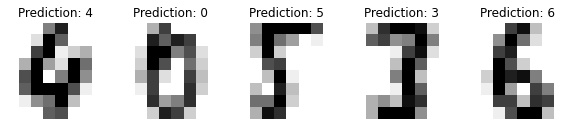

In [99]:
# Plot some predictions
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [100]:
# Print the results on the test set for each class from 0 to 9
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier RandomForestClassifier(max_depth=2, random_state=0):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        53
           1       0.73      0.66      0.69        53
           2       0.79      0.77      0.78        53
           3       0.66      0.74      0.70        53
           4       0.88      0.81      0.84        57
           5       0.88      0.79      0.83        56
           6       0.85      0.98      0.91        54
           7       0.64      1.00      0.78        54
           8       0.94      0.31      0.46        52
           9       0.79      0.80      0.79        55

    accuracy                           0.79       540
   macro avg       0.80      0.78      0.77       540
weighted avg       0.80      0.79      0.77       540




Confusion matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 1 35  1  2  2  1  0  5  0  6]
 [ 1  0 41  9  0  0  0  2  0  0]
 [ 0  1  6 39  0  2  0  4  1  0]
 [ 3  0  0  0 46  0  4  4  0  0]
 [ 0  0  0  1  2 44  5  1  0  3]
 [ 0  0  1  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0 12  3  6  1  2  0  9 16  3]
 [ 2  0  0  2  0  1  0  6  0 44]]


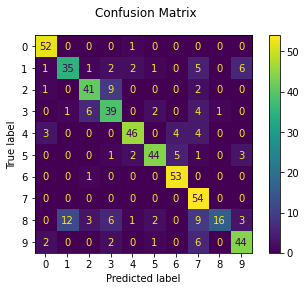

In [101]:
# Plot the confusion matrix
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")